# 1. Configuración del ambiente

In [1]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

/bin/bash: python: command not found
------
Name: pandas
Version: 2.0.3
------
Name: numpy
Version: 1.24.4
------
Name: matplotlib
Version: 3.7.5


## 1.1 importar librerias y definir variables globales

In [2]:
import datetime
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
# Definir variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

# 2. Obtención de datos

## 2.1 Precios historico del bitcoin

In [4]:
def importar_base_bitcoin():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    symbol = 'BTC-USD'

    # fecha de inicio y fin para los últimos 7 días
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=7)

    # Descarga el precio histórico del bitcoin en intervalos de 5 minutos
    data = yf.download(symbol, start=start_date, end=end_date, interval='5m')

    # Pausa durante 5 minutos antes de la proxima actualización
    #time.sleep(300)  # 300 segundos = 5 minutos
    
    df_bitcoin = pd.DataFrame(data)
    #print(df_bitcoin)
    
importar_base_bitcoin()

[*********************100%***********************]  1 of 1 completed


In [5]:
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-09 00:00:00+00:00,62122.835938,62146.078125,62077.582031,62077.582031,62077.582031,0
2024-10-09 00:05:00+00:00,62109.308594,62109.308594,62094.464844,62094.464844,62094.464844,0
2024-10-09 00:10:00+00:00,62060.902344,62106.910156,62060.902344,62106.910156,62106.910156,0
2024-10-09 00:15:00+00:00,62113.429688,62131.031250,62110.515625,62131.031250,62131.031250,0
2024-10-09 00:20:00+00:00,62175.761719,62175.761719,62130.050781,62130.050781,62130.050781,0
...,...,...,...,...,...,...
2024-10-15 23:35:00+00:00,66863.562500,66930.796875,66863.562500,66920.546875,66920.546875,17133568
2024-10-15 23:40:00+00:00,66950.992188,67091.304688,66950.992188,67006.250000,67006.250000,74420224
2024-10-15 23:45:00+00:00,67011.023438,67090.562500,67011.023438,67048.359375,67048.359375,115445760


## 2.2 Scraping Precio bitcoin de coinmarketcap

In [6]:
def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    from bs4 import BeautifulSoup
    import requests

    ua = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62 (compatible; Linux; Ubuntu; MacOS; Windows)"}
    website = 'https://coinmarketcap.com/'
    # Get Request
    response = requests.get(website)
  
    # Soup Object
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de Bitcoin
    nombre = soup.find('p', class_='sc-65e7f566-0 iPbTJf coin-item-name').text
                                    
    # Extraer el precio de Bitcoin
    precio_actual = soup.find('div', class_='sc-b3fc6b7-0 dzgUIj').text
    # Eliminar el signo de dólar, la coma y convertir a float
    precio_actual = float(precio_actual.replace('$', '').replace(',', ''))

    # Extraer variación
    variación = soup.find('span', class_='sc-a59753b0-0 ivvJzO').text

    # Determinar la tendencia (baja o alta) en función del porcentaje de variación, elimina (%)
    porcentaje = float(variación.strip('%'))
    if porcentaje < 0:
        tendencia = 'baja'
    else:
        tendencia = 'alta'

    # Imprimir el nombre, el precio y la tendencia
    print(f"Nombre: {nombre}")
    print(f"Precio_actual: {precio_actual}")
    print(f"Tendencia: {tendencia}")

extraer_tendencias()


Nombre: Bitcoin
Precio_actual: 67702.95
Tendencia: alta


In [7]:
from bs4 import BeautifulSoup
import requests

#ua = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62"}

ua = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62 (compatible; Linux; Ubuntu; MacOS; Windows)"}
website = 'https://coinmarketcap.com/'
#Get Reques
response = requests.get(website)
#Status Code
response.status_code
#Soup Object
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer el nombre de Bitcoin
nombre = soup.find('p', class_='sc-65e7f566-0 iPbTJf coin-item-name').text

# Extraer el precio de Bitcoin
precio_actual = soup.find('div', class_='sc-b3fc6b7-0 dzgUIj').text
# Eliminar el signo de dólar y la coma y convertir a punto flotante
precio_actual = float(precio_actual.replace('$', '').replace(',', ''))


variación = soup.find('span', class_='sc-a59753b0-0 ivvJzO').text
#tendencia = soup.find('span', class_='icon-Caret-up').text

clase_tendencia = soup.find('span', class_='sc-a59753b0-0 cmnujh').text

if clase_tendencia=="icon-Caret-up":
         tendencia="alta"
if clase_tendencia=="icon-Caret-down":
         tendencia="baja"
        
# Imprimir el nombre y el precio
print(f"Nombre: {nombre}")
print(f"Precio_actual: {precio_actual}")
print(f"Variación: {variación}")
print(f"clase_tendencia: {tendencia}")

Nombre: Bitcoin
Precio_actual: 67702.95
Variación: 0.01%
clase_tendencia: alta


# 3. Limpieza de datos

In [8]:
# df antes de eliminar volumen mayo a 0
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-09 00:00:00+00:00,62122.835938,62146.078125,62077.582031,62077.582031,62077.582031,0
2024-10-09 00:05:00+00:00,62109.308594,62109.308594,62094.464844,62094.464844,62094.464844,0
2024-10-09 00:10:00+00:00,62060.902344,62106.910156,62060.902344,62106.910156,62106.910156,0
2024-10-09 00:15:00+00:00,62113.429688,62131.031250,62110.515625,62131.031250,62131.031250,0
2024-10-09 00:20:00+00:00,62175.761719,62175.761719,62130.050781,62130.050781,62130.050781,0
...,...,...,...,...,...,...
2024-10-15 23:35:00+00:00,66863.562500,66930.796875,66863.562500,66920.546875,66920.546875,17133568
2024-10-15 23:40:00+00:00,66950.992188,67091.304688,66950.992188,67006.250000,67006.250000,74420224
2024-10-15 23:45:00+00:00,67011.023438,67090.562500,67011.023438,67048.359375,67048.359375,115445760


In [9]:
df_bitcoin.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

[False False False ... False False False]
Valores nulos en Close: 0


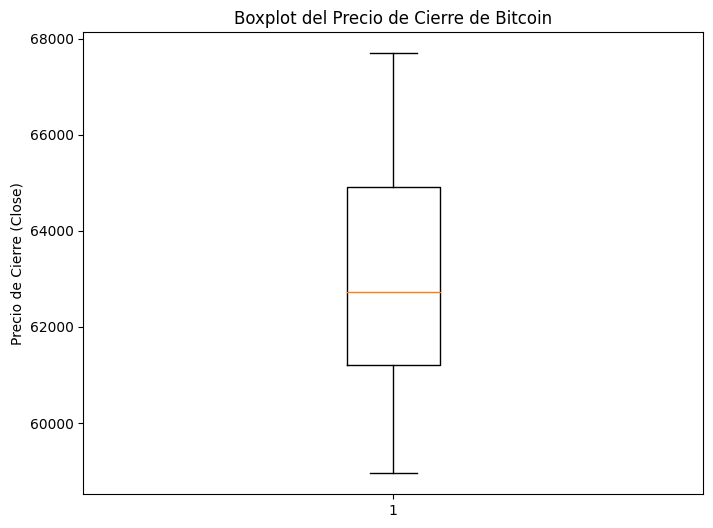

cuantil 1 : 61213.140625
cuantil 3 : 64913.83203125


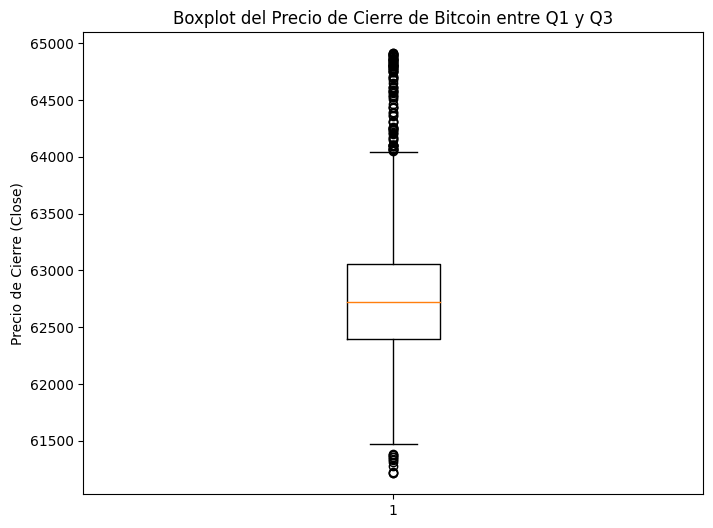

Precio promedio bitcoin:  62918.98563415751


In [10]:
def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio
    import numpy as np

    df_bitcoin_limpio = df_bitcoin.copy()

    # Identificar valores duplicados en el índice
    valores_duplicados_en_indice = df_bitcoin_limpio.index.duplicated()
    print(valores_duplicados_en_indice)

    # Eliminar los valores duplicados en el índice
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
    #df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates(keep='first')

    # verificar y ver los valores nulos en la columna 
    df_bitcoin_nulos = df_bitcoin_limpio['Close'].isnull().sum()
    print("Valores nulos en Close:", df_bitcoin_nulos)
    # Elimina valores nulos en la columna Close
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])


    # Filtra los registros con Volumen mayor a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # crea un grafico de caja de la columna close
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
    plt.ylabel('Precio de Cierre (Close)')
    plt.title('Boxplot del Precio de Cierre de Bitcoin')
    plt.show()

    # Calcula los cuartiles Q1 y Q3 
    Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
    Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
    print("cuantil 1 :", Q1)
    print("cuantil 3 :", Q3)
    # Filtra para tener un precio de cierre entre Q1 y Q3
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]
    # grafico el df con los valores entre q1 y q3
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
    plt.ylabel('Precio de Cierre (Close)')
    plt.title('Boxplot del Precio de Cierre de Bitcoin entre Q1 y Q3')
    plt.show()

    # Calcula el precio promedio de la columna close
    media_bitcoin = df_bitcoin_limpio['Close'].mean()
    print("Precio promedio bitcoin: ", media_bitcoin)
limpieza_datos()    

In [11]:
# df despues de eliminar volumen mayo a 0
df_bitcoin_limpio

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-09 00:40:00+00:00,62016.199219,62029.078125,62008.777344,62029.078125,62029.078125,39301120
2024-10-09 00:45:00+00:00,62023.675781,62102.351562,62009.761719,62102.351562,62102.351562,63232000
2024-10-09 00:50:00+00:00,62103.277344,62103.277344,62048.085938,62052.253906,62052.253906,73728000
2024-10-09 00:55:00+00:00,62075.246094,62088.054688,62075.246094,62082.085938,62082.085938,18016256
2024-10-09 01:05:00+00:00,62105.019531,62163.234375,62105.019531,62163.234375,62163.234375,27015168
...,...,...,...,...,...,...
2024-10-14 13:15:00+00:00,64799.371094,64859.890625,64792.363281,64828.894531,64828.894531,47104000
2024-10-14 13:20:00+00:00,64800.925781,64802.519531,64756.597656,64756.597656,64756.597656,94691328
2024-10-14 13:25:00+00:00,64766.703125,64766.703125,64669.683594,64702.781250,64702.781250,35827712


In [12]:
# Contar cuantos datos duplicados existen
df_bitcoin_limpio.duplicated().sum()

0

# 4. Tomar decisiones

In [13]:
Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.
Extra
Este es un algoritmo de decisión simple que ayuda a los clientes inexpertos a conocer el mejor momento de comprar
o vender Bitcoin, ¿crees que existan otros indicadores en la base o en el site de noticias o algún criterio de 
decisión adicional que ayudaría a reforzar el algoritmo de decisión? Te invito a descubrir otras alternativas.


SyntaxError: invalid syntax (1316734583.py, line 1)

In [14]:
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    # Obtener el último precio de cierre del DataFrame
    #precio_actual = df_bitcoin['Close'].iloc[-1]
    
    # Lógica de toma de decisiones
    if precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'alta':
        algoritmo_decision = 'Comprar'
    else:
        algoritmo_decision = ''
    
    # Imprimir la decisión
    print(f"Precio actual: {precio_actual}, Precio promedio: {media_bitcoin}, Tendencia: {tendencia}, Decisión: {algoritmo_decision}")
tomar_decisiones()

Precio actual: 67702.95, Precio promedio: 62918.98563415751, Tendencia: alta, Decisión: 


# 5. Visualización

In [15]:
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.

SyntaxError: invalid syntax (4081888310.py, line 1)

Precio actual: 67702.95, Precio promedio: 62918.98563415751, Tendencia: alta, Decisión: 


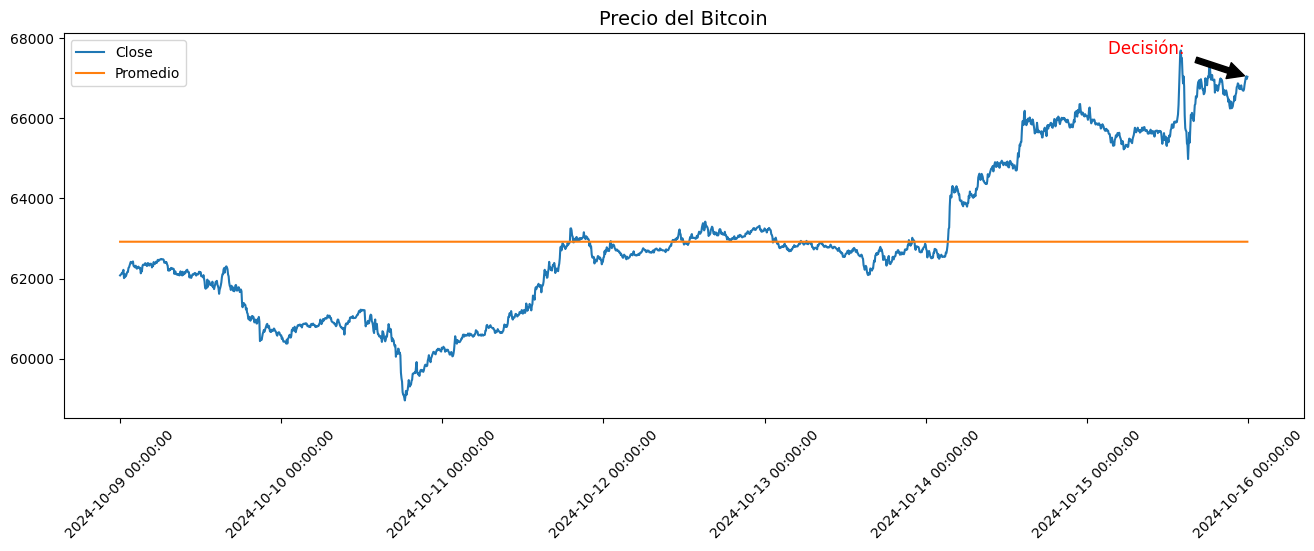

In [16]:
def visualizacion():
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    global df_bitcoin, media_bitcoin, algoritmo_decision
    
    # Crear una nueva columna en df_bitcoin y llenar con los valores del promedio
    df_bitcoin['Promedio'] = media_bitcoin
    
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(16, 5))
    
    # Dibujar una línea con los datos de la columna 'Close' usando el índice como eje x
    plt.plot(df_bitcoin.index, df_bitcoin['Close'], label='Close')
    
    # Dibujar una línea con los datos de la columna 'Promedio'
    plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Promedio')
    
    # Agregar un título al gráfico
    plt.title('Precio del Bitcoin', fontsize=14, color='black')
    
    # Mostrar un mensaje con la decisión en el gráfico
    plt.annotate(f'Decisión: {algoritmo_decision}', 
                 xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),  # posición en el gráfico
                 xytext=(-100, 20),  # desplazamiento del texto
                 textcoords='offset points',  # usar el desplazamiento en puntos
                 fontsize=12, color='red', 
                 ha='left', va='center',  # alineación horizontal y vertical
                 arrowprops=dict(facecolor='black', shrink=0.05))  # agregar una flecha
    
    # Configurar el formato de las fechas en el eje x
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    
    # Rotar las etiquetas del eje x para mejorar la legibilidad
    plt.xticks(rotation=45)
    
    # Agregar una leyenda para las líneas
    plt.legend()
    
    # Mostrar el gráfico en pantalla
    plt.show()

# Llamamos a la función de toma de decisiones
tomar_decisiones()

# Llamamos a la función de visualización
visualizacion()


In [83]:
df_bitcoin.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Promedio     float64
DateStr       object
dtype: object

# 6. Automatización

In [ ]:
# Llamamos a todas las funciones con un delay de 300 segundos!!!!
# Esto permite que el script actualice y muestre los datos periódicamente cada 5 minutos.
# El código tiene una estructura try...except que maneja excepciones y muestra fallo en caso de un error.
while(True):
  try:
   
   #clear_output()
   importar_base_bitcoin()
   extraer_tendencias()
   limpieza_datos()
   tomar_decisiones()
   visualizacion()
   #resumen_operaciones()
   time.sleep(300)
  except:
   print("fallo")